# Commit Time Distribution and Correlation Analysis (Attribute Split)

This notebook analyzes the distribution of commit times and their correlation with string and numeric attribute counts per block, using the data from `sampled_50k_attrsplit.db.csv`. The structure follows the original `commit_time_distribution.ipynb` template.

## 1. Import Required Libraries

Import pandas, numpy, matplotlib, seaborn, and any other libraries needed for data analysis and visualization.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

## 2. Load Commit Data

Load the commit data from the CSV file `data/sampled_50k_attrsplit.db.csv` into a pandas DataFrame.

In [2]:
# Load Commit Data
csv_path = "data/sampled_50k_attrsplit.db.csv"
df = pd.read_csv(csv_path)
df.head()

,block_nr,num_entities,num_attributes,num_string_attrs,num_numeric_attrs,payload_kb,commit_time_ms,db_size_kb
0,1,1,13,8,5,0,0,4
1,2,3,27,12,15,0,1,4
2,3,3,27,12,15,0,1,4
3,4,2,30,16,14,0,1,4
4,5,21,532,366,166,92,5,4


## 3. Visualize Commit Time Distribution

Plot histograms and density plots to visualize the distribution of commit times across all blocks.

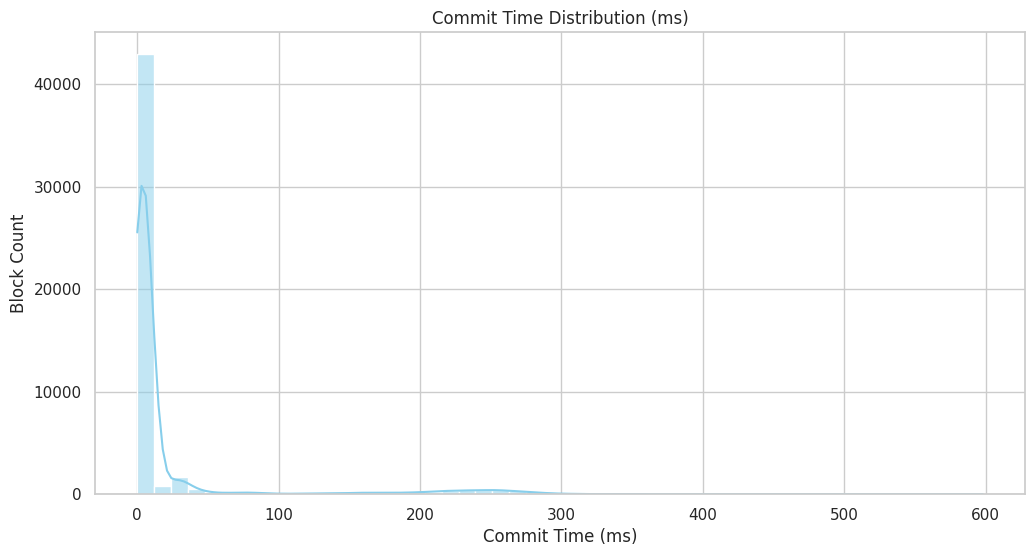

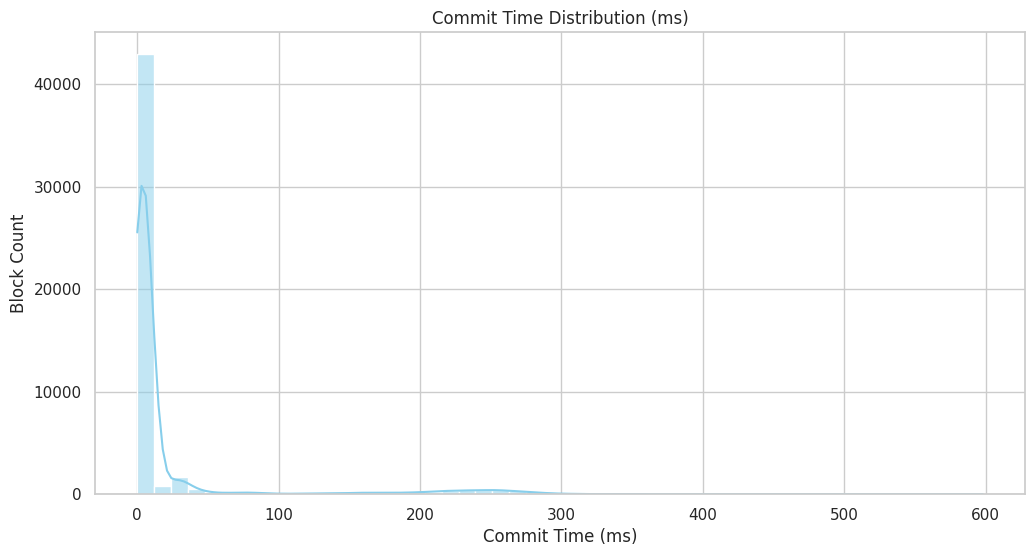

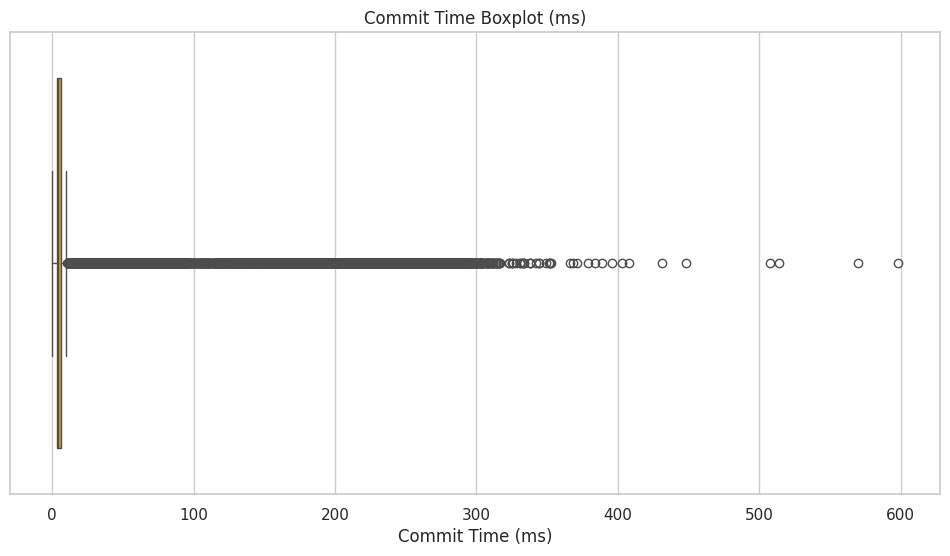

In [3]:
# Visualize Commit Time Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['commit_time_ms'], bins=50, kde=True, color='skyblue')
plt.title('Commit Time Distribution (ms)')
plt.xlabel('Commit Time (ms)')
plt.ylabel('Block Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['commit_time_ms'], color='orange')
plt.title('Commit Time Boxplot (ms)')
plt.xlabel('Commit Time (ms)')
plt.show()

## 4. Correlation Analysis with Attribute Counts

Calculate and visualize correlations between commit times and the number of string and numeric attributes per block.

Correlation matrix:
                   commit_time_ms  num_string_attrs  num_numeric_attrs  \
commit_time_ms           1.000000          0.969025           0.936612   
num_string_attrs         0.969025          1.000000           0.957697   
num_numeric_attrs        0.936612          0.957697           1.000000   
num_entities             0.915492          0.933657           0.996518   
payload_kb              -0.056271         -0.070531          -0.070560   

                   num_entities  payload_kb  
commit_time_ms         0.915492   -0.056271  
num_string_attrs       0.933657   -0.070531  
num_numeric_attrs      0.996518   -0.070560  
num_entities           1.000000   -0.072758  
payload_kb            -0.072758    1.000000  

Correlation of each variable with commit_time_ms:
commit_time_ms       1.000000
num_string_attrs     0.969025
num_numeric_attrs    0.936612
num_entities         0.915492
payload_kb          -0.056271
Name: commit_time_ms, dtype: float64


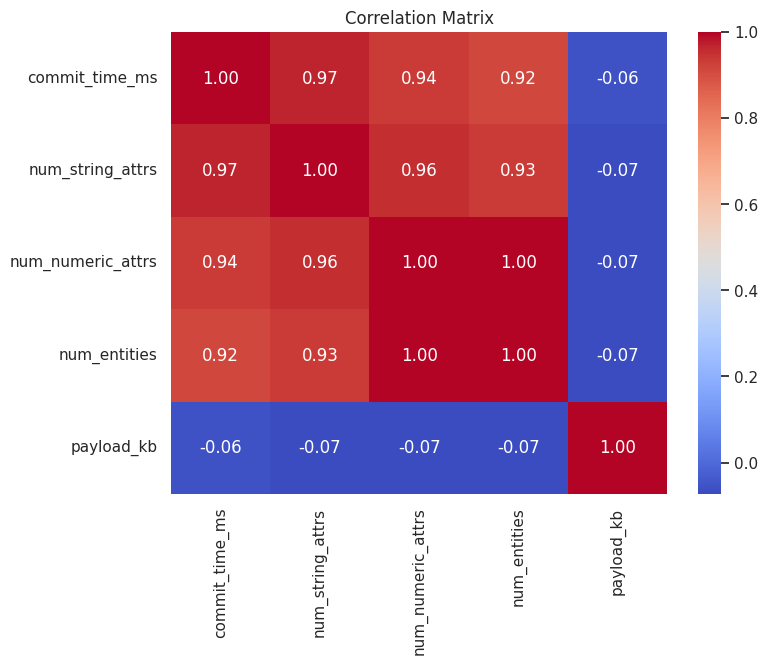

Correlation matrix:
                   commit_time_ms  num_string_attrs  num_numeric_attrs  \
commit_time_ms           1.000000          0.969025           0.936612   
num_string_attrs         0.969025          1.000000           0.957697   
num_numeric_attrs        0.936612          0.957697           1.000000   
num_entities             0.915492          0.933657           0.996518   
payload_kb              -0.056271         -0.070531          -0.070560   

                   num_entities  payload_kb  
commit_time_ms         0.915492   -0.056271  
num_string_attrs       0.933657   -0.070531  
num_numeric_attrs      0.996518   -0.070560  
num_entities           1.000000   -0.072758  
payload_kb            -0.072758    1.000000  

Correlation of each variable with commit_time_ms:
commit_time_ms       1.000000
num_string_attrs     0.969025
num_numeric_attrs    0.936612
num_entities         0.915492
payload_kb          -0.056271
Name: commit_time_ms, dtype: float64


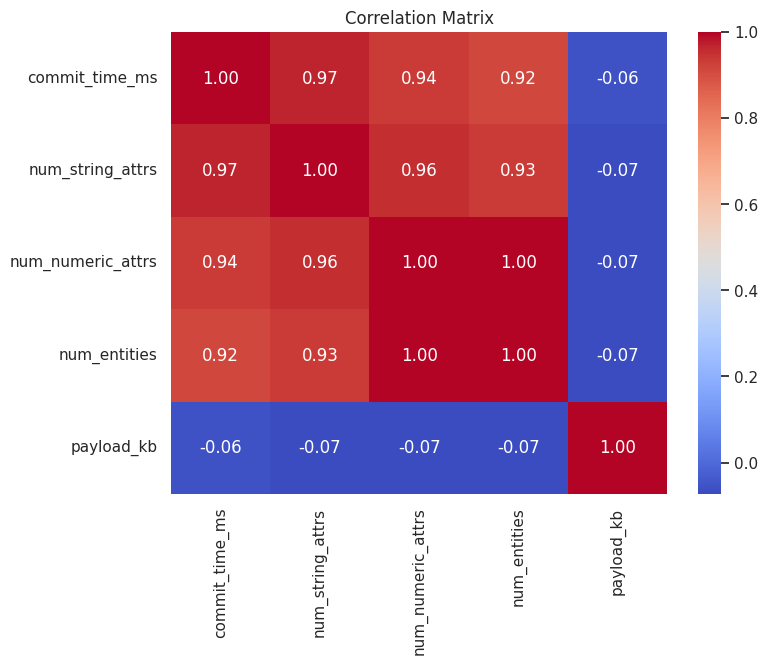

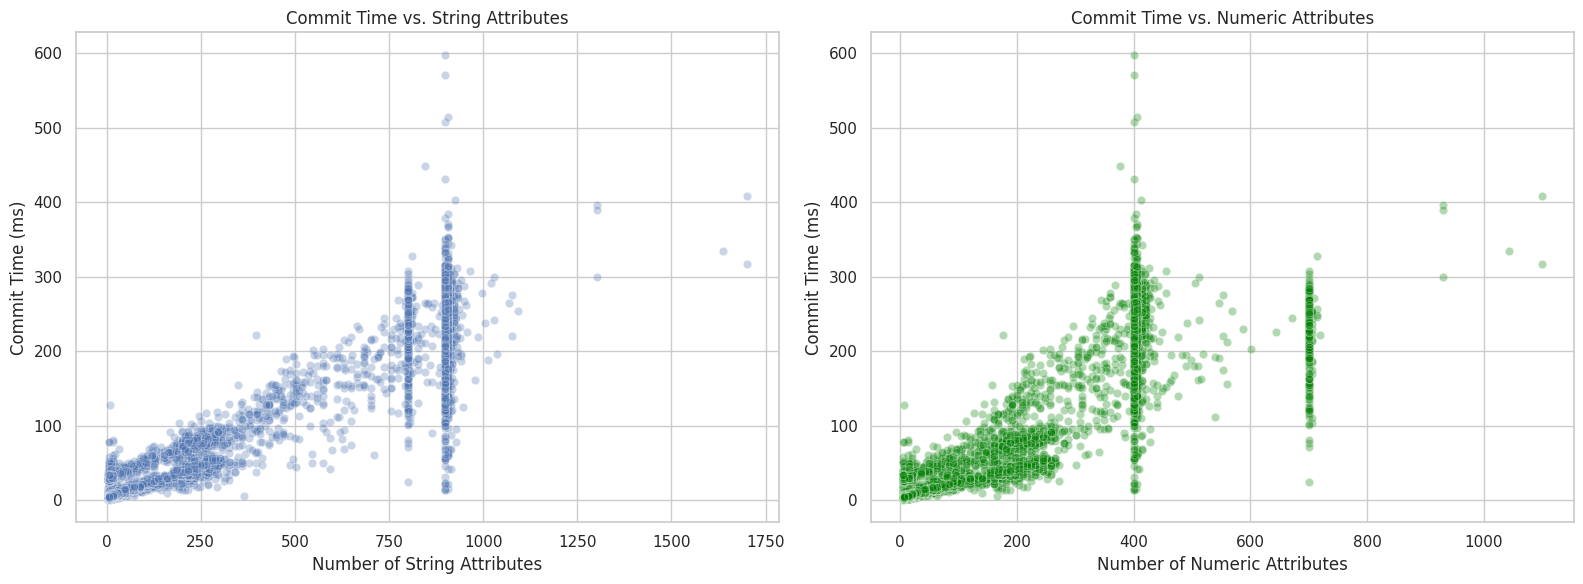

In [7]:
# Correlation Analysis
corr = df[['commit_time_ms', 'num_string_attrs', 'num_numeric_attrs', 'num_entities', 'payload_kb']].corr()
print(corr['commit_time_ms'])

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(ax=axes[0], x='num_string_attrs', y='commit_time_ms', data=df, alpha=0.3)
axes[0].set_title('Commit Time vs. String Attributes')
axes[0].set_xlabel('Number of String Attributes')
axes[0].set_ylabel('Commit Time (ms)')
sns.scatterplot(ax=axes[1], x='num_numeric_attrs', y='commit_time_ms', data=df, alpha=0.3, color='green')
axes[1].set_title('Commit Time vs. Numeric Attributes')
axes[1].set_xlabel('Number of Numeric Attributes')
axes[1].set_ylabel('Commit Time (ms)')
plt.tight_layout()
plt.show()

## 5. Statistical Summary of Commit Times

Provide descriptive statistics (mean, median, mode, standard deviation) for commit times and discuss any observed patterns.

count    50000.000000
mean        21.332760
std         57.223565
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max        598.000000
Name: commit_time_ms, dtype: float64
Median: 4.0
Mode: 3


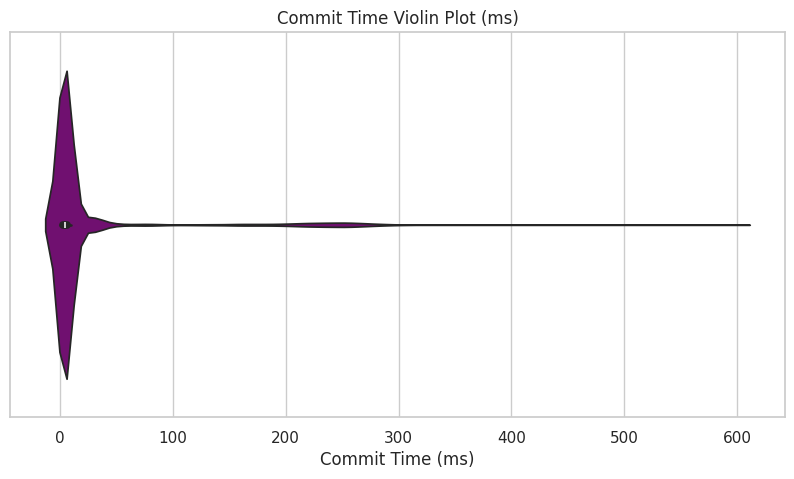

In [5]:
# Statistical Summary
summary = df['commit_time_ms'].describe()
print(summary)

median = df['commit_time_ms'].median()
mode = df['commit_time_ms'].mode()[0]
print(f"Median: {median}")
print(f"Mode: {mode}")

plt.figure(figsize=(10, 5))
sns.violinplot(x=df['commit_time_ms'], color='purple')
plt.title('Commit Time Violin Plot (ms)')
plt.xlabel('Commit Time (ms)')
plt.show()